## Airspeed Fundamentals

Various Effects
* Compressibility of the air
* Sensor inaccuracies
* Mounting location of the sensor (Indicated airspeed)
* Atmospheric condition (estimating mass density)

Dynamic pressure $q$ as it appears in the Bernoulli equation:
$$
\begin{equation}
  q = \frac{1}{2} \rho v^2
\end{equation}
\tag{Eq 1}
$$

$v$ is the air velocity, or the true airspeed (TAS), and $\rho$ is the mass density of air.

Notes:
* Bernoulli equation is for ideal fluids (incompressible and inviscid
* $\rho$ cannot be measured directly and mist be estimated somehow


Effect of air compressibility:
$$
\begin{equation}
q_c = p_s \Bigg\{ \left[ \frac{\kappa-1}{\kappa} 
\bigg( \frac{\rho}{2} v^2 \bigg) -1 \right]^\frac{\kappa}{\kappa -1} - 1\Bigg\} \approx \frac{\rho}{2} v^2 + \frac{1}{\kappa p_s} \left[ \frac{\rho}{2} v^2 \right]^2
\end{equation}
\tag{Eq 2}
$$
[Source](https://ntrs.nasa.gov/api/citations/19930091914/downloads/19930091914.pdf)

where $p_s$ is static pressure and $\kappa$ is heat capacity ratio.

$q_c$ is the difference between total pressure $p_t$ and static pressure $p_s$, $q_c = p_t - p_s$. This is also called ram or impact pressure. This can be measured by differential pressure sensors.

Estimating $\rho$ is tricky. For the example below I used standard atmosphere at standard sea level (SSL). Measurements of air temperature $T$ and static pressure $p_s$ can be used to estimate $\rho$. The subscript zero will be used to represent SSL conditions.

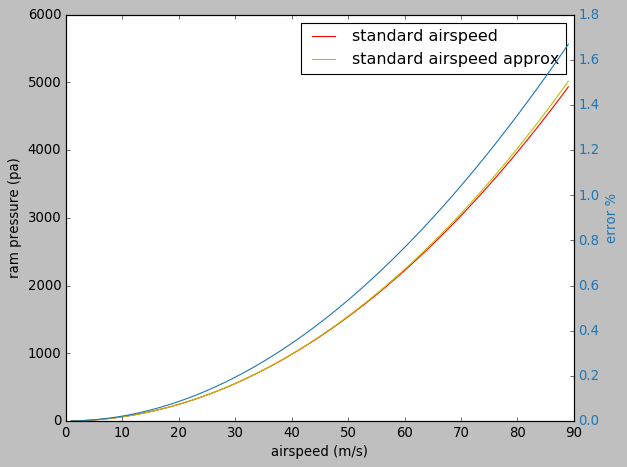

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

min_airspeed = 1  # m/s
max_airspeed = 90  # m/s ~ 200mph

kappa = 1.4  # heat capacity ratio, ideal diatomic
p_zero = 101325  # pascals, 1 atm = 101325 pa
rho_zero = 1.225  # kg/m^3

airspeeds = np.array(range(min_airspeed, max_airspeed))

def standard_airspeed(v, rho, ps):
    q = 0.5*rho*v**2
    r = (kappa - 1) / (kappa*ps)
    s = (kappa) / (kappa - 1)
    t = np.power( (q*r) + 1 , s) - 1
    return ps * t

def standard_airspeed_approx(v, rho, ps):
    q = 0.5*rho*v**2
    r = np.power(q, 2) / (kappa*ps)
    return q + r

q_standard = standard_airspeed(airspeeds, rho_zero, p_zero)
q_approx = standard_airspeed_approx(airspeeds, rho_zero, p_zero)
q_error = np.absolute(100 * (q_approx - q_standard) / q_standard)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('airspeed (m/s)', fontsize=12)
ax1.set_ylabel('ram pressure (pa)', fontsize=12)
ax1.plot(airspeeds, q_standard, 'r-', label='standard airspeed')
ax1.plot(airspeeds, q_approx, 'y-', label='standard airspeed approx')
plt.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('error %', color=color)  # we already handled the x-label with ax1
ax2.plot(airspeeds, q_error, color=color, label='error %')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## True Airspeed (TAS)

Velocity is calculated from the impact pressure $q_c$ and the static pressure $p_s$ given in Eq 2.

$v=f \sqrt{ \frac{2}{\rho} q_c }$
with
$f=\sqrt{\frac{\kappa}{\kappa -1} \frac{p_s}{q_c} \left[ \bigg( \frac{q_c}{p_s} +1 \bigg)^\frac{\kappa -1}{\kappa} -1 \right] } \approx 1- \frac{1}{4\kappa} \frac{q_c}{p_s}  $
$\tag{Eq 3 & 4} $

[Source](https://ntrs.nasa.gov/api/citations/19930091914/downloads/19930091914.pdf)

$f$ is the compressibility factor. At low speeds and small impact pressures the fluid behavior can be describe without considering compressibility.

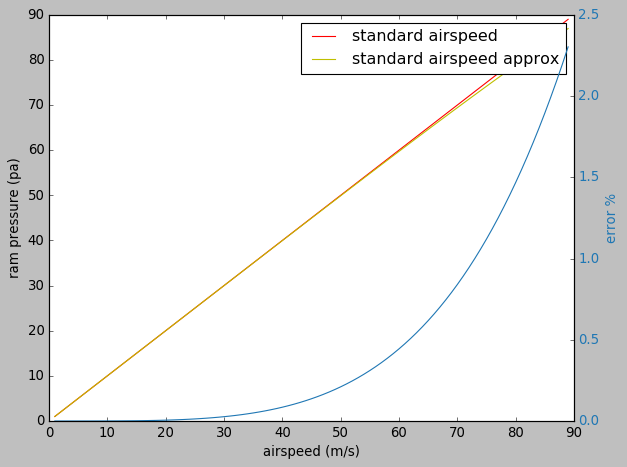

In [47]:
min_airspeed = 1  # m/s
max_airspeed = 90  # m/s

kappa = 1.4  # heat capacity ratio, ideal diatomic
p_static = 10000  # pascals
p_zero = 101325 # 1 atm = 101325 pa
rho = 1.225  # kg/m^3

airspeeds = np.array(range(min_airspeed, max_airspeed))

q_standard_2 = standard_airspeed(airspeeds, rho, p_static)

def tas(qc, f):
    # True Air Speed
    return f * np.sqrt(2 * qc / rho_zero)

def comp_factor(qc, ps):
    r = (kappa*ps) / (qc*(kappa - 1))
    s = np.power( (qc/ps)+1, (kappa-1)/kappa) - 1
    return np.sqrt(r*s)

def comp_factor_approx(qc, ps):
    return 1 - ( qc / (4*kappa*ps) )

tas_standard = tas(q_standard_2, comp_factor(q_standard_2, p_static))
tas_approx = tas(q_standard_2, comp_factor_approx(q_standard_2, p_static))

tas_error = np.absolute(100 * (tas_approx - tas_standard) / tas_standard)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('airspeed (m/s)', fontsize=12)
ax1.set_ylabel('ram pressure (pa)', fontsize=12)
ax1.plot(airspeeds, tas_standard, 'r-', label='standard airspeed')
ax1.plot(airspeeds, tas_approx, 'y-', label='standard airspeed approx')
plt.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('error %', color=color)  # we already handled the x-label with ax1
ax2.plot(airspeeds, tas_error, color=color, label='error %')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Equivalent Airspeed (EAS)
$ v_{eq} $ is related to TAS by:

$v_{eq}=v \sqrt{ \frac{\rho}{\rho_0} } \tag{Eq 5} $

## Calibrated Airspeed (CAS)

Calibrate airspeed is determined by calibraating the airspeed sensor so that iy yields the TAS at SSL.

$v=f_0 \sqrt{ \frac{2}{\rho} q_c }$
with
$f_0=\sqrt{\frac{\kappa}{\kappa -1} \frac{p_0}{q_c} \left[ \bigg( \frac{q_0}{p_s} +1 \bigg)^\frac{\kappa -1}{\kappa} -1 \right] }$
$\tag{Eq 6 & 7} $

Static pressure is fixed to $p_s=p_0$. $v_{cal}$ is defined by:
$v_{cal} = f_0 \sqrt{ \frac{2}{\rho} q_c } \tag{Eq 8} $

[Source](https://ntrs.nasa.gov/api/citations/19930091914/downloads/19930091914.pdf)

## Relating TAS, CAS, and EAS

$v = \sqrt{ \frac{\rho_0}{\rho} v_{eq} } \tag{Eq 9} $
$v_{eq} = \frac{f}{f_0} v_{cal} \tag{Eq 10} $
$v = \frac{f}{f_0} \sqrt{ \frac{\rho_0}{\rho} } v_{cal} \tag{Eq 11} $

At low airspeeds and low impact pressure, the copressibility factor are close to one and EAS and CAS are the same.